In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from funciones_complementarias import FuncionesComplementarias as fc
warnings.filterwarnings('ignore')
%matplotlib inline

In [9]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [187]:
def mostrar_información(df, column):
    print("------------------------------------")
    print("Type:")
    print(type(df[column][0]))
    print("------------------------------------")
    print("Describe:")
    print(df[column].describe())
    print("------------------------------------")
    print("Unique:")
    print(df[column].value_counts())
    print("------------------------------------")
    print("Random values:")
    sample_values = df[column].sample(n=15)
    print(sample_values)
    print("------------------------------------")
    filtered_data = df_train.dropna(subset=[column])
    print("Anova:")
    groups = filtered_data.groupby(column)['SalePrice'].apply(list)
    F, p = stats.f_oneway(*groups)
    print(f"F-statistic: {F}, p-value: {p}")

### Información variables categóricas y numéricas discretas

In [ ]:
varaible = 'Foundation'
x_ = df_train[varaible]
y_ = df_train['SalePrice']
mostrar_información(df_train, varaible)
#distribución de la variable x graficamente:
sns.displot(x_)
plt.show()
sns.barplot(x=x_, y=y_)
plt.xlabel(x_.name)
plt.ylabel('Sale Price')
plt.title('Sale Price by ' + x_.name)
plt.show()
sns.boxplot(x=x_, y=y_)
plt.xlabel(x_.name)
plt.ylabel('Sale Price')
plt.title('Sale Price by ' + x_.name)
plt.show()


### Información variables Numéricas

In [ ]:
varaible = 'LotFrontage'
x_ = df_train[varaible]
y_ = df_train['SalePrice']
mostrar_información(df_train, varaible)
#distribución de la variable x graficamente:
sns.histplot(x_,kde=True,legend=True)
plt.show()
#scater plot con lineas de regresión

sns.scatterplot(x=x_, y=y_,alpha=0.7)
plt.xlabel(x_.name)
plt.ylabel('Sale Price')
plt.title('Sale Price by ' + x_.name)
plt.show()


##### Habiendo revisado la distribución de todas las variables y su relación, saco como conclusión que  menor P-Value, mayor relevancia tienen en la variable objetivo; a contiuación saco un csv con P-Value, para comparar mis intuiciones con lo que indica el P-Value

### Tratamiento de variables

In [215]:
df_pre = df_train

### Revisión P-Value de todas las variables para confirmar análisis

In [217]:
#Función que me liste el P-Value de todas las variables con respecto a SalePrice
def anova(df, column):
    filtered_data = df.dropna(subset=[column])
    groups = filtered_data.groupby(column)['SalePrice'].apply(list)
    F, p = stats.f_oneway(*groups)
    return p


In [222]:
df_anova = pd.DataFrame()
df_anova['variable'] = df_pre.columns
df_anova['p_value'] = df_anova['variable'].apply(lambda x: anova(df_pre, x))
df_anova = df_anova.sort_values('p_value')
#Add a column with the significance level
alpha = 0.05
df_anova['significant'] = df_anova['p_value'].apply(lambda x: 'Yes' if x < alpha else 'No')
#Add a column with the mean of SalePrice
df_anova['mean'] = df_anova['variable'].apply(lambda x: df_pre.groupby(x)['SalePrice'].mean().std())
#Add a clumn with the order of the variable
df_anova['order'] = range(1, len(df_anova) + 1)
#export the data to csv
df_anova.to_csv('anova.csv', index=False)
df_anova.head(10)

,variable,p_value,significant,mean,order
17,OverallQual,0.000000e+00,Yes,133581.054206,1
80,SalePrice,0.000000e+00,Yes,99639.724589,2
12,Neighborhood,1.558600e-225,Yes,66725.196972,3
61,GarageCars,1.121129e-211,Yes,79829.273233,4
27,ExterQual,1.439551e-204,Yes,121669.389152,5
53,KitchenQual,3.032213e-192,Yes,98569.621328,6
30,BsmtQual,9.610615e-186,Yes,94368.336203,7
62,GarageArea,1.070514e-158,Yes,92365.899289,8
49,FullBath,3.802188e-129,Yes,94101.921238,9
19,YearBuilt,9.128104e-107,Yes,55775.657497,10


#### A continuación una representación de las variables con más significado:

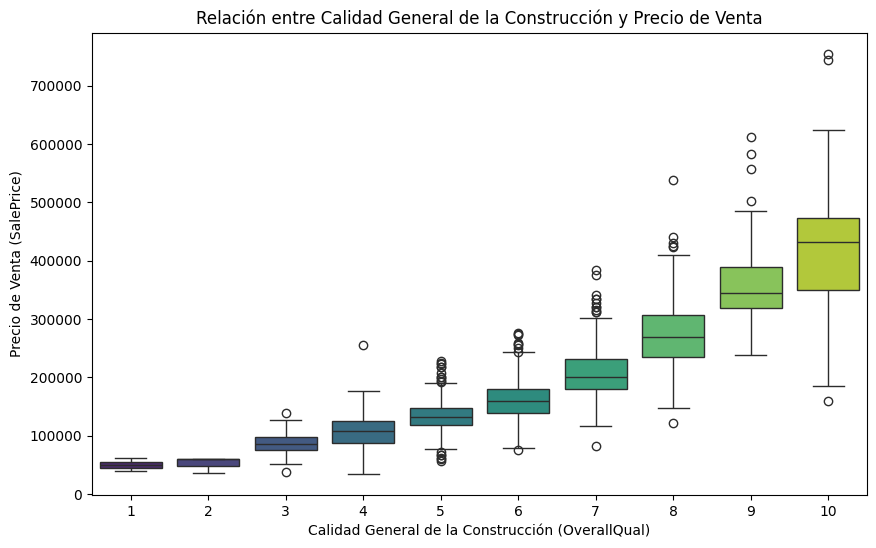

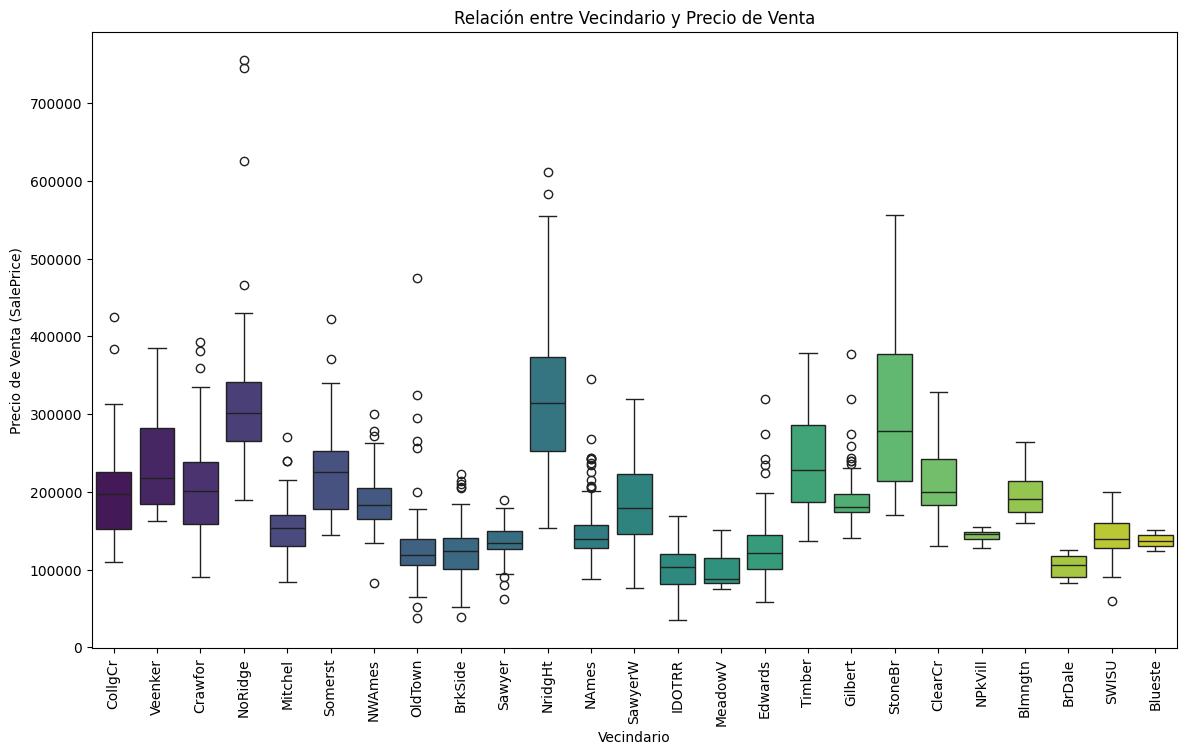

In [227]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_pre['OverallQual'], y=df_pre['SalePrice'], palette='viridis')
plt.xlabel('Calidad General de la Construcción (OverallQual)')
plt.ylabel('Precio de Venta (SalePrice)')
plt.title('Relación entre Calidad General de la Construcción y Precio de Venta')
plt.show()
plt.figure(figsize=(14, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df_pre, palette='viridis')
plt.xlabel('Vecindario')
plt.ylabel('Precio de Venta (SalePrice)')
plt.title('Relación entre Vecindario y Precio de Venta')
plt.xticks(rotation=90)  # Rotar etiquetas para mejor legibilidad
plt.show()

### Gestión de los Valores Nulos

In [228]:
# función que indica los valores nulos de un dataframe y el porcentaje relativo de nulos respecto al total de valores
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Valores perdidos', 1 : '% del total'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% del total', ascending=False).round(1)
        print ("Su selección tiene " + str(df.shape[1]) + " columnas.\n"      
            "Hay " + str(mis_val_table_ren_columns.shape[0]) +
              " columnas que tienen valores perdidos.")
        return mis_val_table_ren_columns

In [229]:
missing_values_table(df_train)

Su selección tiene 83 columnas.
Hay 19 columnas que tienen valores perdidos.


,Valores perdidos,% del total
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
MasVnrType,872,59.7
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5


##### Procedo a eliminar las variables que tengan más de un 50% de sus valores nulos

In [230]:
#Función que me permita eliminar columnas con más de un 50% de valores perdidos
def drop_columns(df, threshold):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    missing_values = missing_values / df.shape[0]
    missing_values = missing_values[missing_values > threshold]
    df = df.drop(missing_values.index, axis=1)
    return df